## 1. Libraries and Datasets

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [9]:
# Load datasets
customers = pd.read_csv("Dataset/customers_dataset.csv")
orders = pd.read_csv("Dataset/orders_dataset.csv")
order_items = pd.read_csv("Dataset/order_items_dataset.csv")
order_payments = pd.read_csv("Dataset/order_payments_dataset.csv")
order_reviews = pd.read_csv("Dataset/order_reviews_dataset.csv")
products = pd.read_csv("Dataset/products_dataset.csv")
product_translation = pd.read_csv("Dataset/product_category_name_translation.csv")
geolocation = pd.read_csv("Dataset/geolocation_dataset.csv")
sellers = pd.read_csv("Dataset/sellers_dataset.csv")

## 2. Data Inspection

In [52]:
# Merge relevant datasets into one
merged_df = orders.merge(customers, on='customer_id', how='left') \
    .merge(order_items, on='order_id', how='left') \
    .merge(order_payments, on='order_id', how='left') \
    .merge(order_reviews, on='order_id', how='left') \
    .merge(products, on='product_id', how='left') \
    .merge(product_translation, on='product_category_name', how='left')

for name, df in [('Merged Olist DF', merged_df)]:
    print(f"\n{name} Dataset:")
    display(df.info())
    display(df.describe(include='all'))


Merged Olist DF Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119151 entries, 0 to 119150
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       119151 non-null  object 
 1   customer_id                    119151 non-null  object 
 2   order_status                   119151 non-null  object 
 3   order_purchase_timestamp       119151 non-null  object 
 4   order_approved_at              118974 non-null  object 
 5   order_delivered_carrier_date   117065 non-null  object 
 6   order_delivered_customer_date  115730 non-null  object 
 7   order_estimated_delivery_date  119151 non-null  object 
 8   customer_unique_id             119151 non-null  object 
 9   customer_zip_code_prefix       119151 non-null  int64  
 10  customer_city                  119151 non-null  object 
 11  customer_state                 119151 non-null  object 
 12  orde

None

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
count,119151,119151,119151,119151,118974,117065,115730,119151,119151,119151.000000,...,119151,116609,116609.000000,116609.000000,116609.000000,118298.000000,118298.000000,118298.000000,118298.000000,116584
unique,99441,99441,8,88789,50462,61544,75649,459,96096,NaN,...,89500,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71
top,895ab968e7bb0d5659d16cd74cd1650c,270c23a11d024a44c896d1894b261a83,delivered,2017-08-08 20:26,2018-01-10 10:32,2017-08-10 11:58,2017-08-14 12:46,2017-12-20 0:00,9a736b248f67d166d2fbb006bcb877c3,NaN,...,2017-08-17 22:17,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bed_bath_table
freq,63,63,115731,63,121,63,63,663,75,NaN,...,63,11990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11990
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35033.953253,...,NaN,NaN,48.767402,785.950441,2.205113,2112.302803,30.264865,16.619994,23.074896,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29823.224176,...,NaN,NaN,10.033526,652.571474,1.717418,3786.673988,16.188992,13.453771,11.749216,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1003.000000,...,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11250.000000,...,NaN,NaN,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24240.000000,...,NaN,NaN,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58475.000000,...,NaN,NaN,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,NaN


## 3. Handle missing values

In [54]:
# Check all initial missing values
missing = merged_df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
display(pd.DataFrame({'Missing Values': missing}))

,Missing Values
review_comment_title,104962
review_comment_message,67901
order_delivered_customer_date,3421
product_category_name_english,2567
product_description_lenght,2542
product_name_lenght,2542
product_category_name,2542
product_photos_qty,2542
order_delivered_carrier_date,2086
product_weight_g,853


In [56]:
# Convert date fields
date_cols = [
    'order_purchase_timestamp', 'order_approved_at',
    'order_delivered_carrier_date', 'order_delivered_customer_date',
    'order_estimated_delivery_date', 'review_creation_date',
    'review_answer_timestamp', 'shipping_limit_date'
]

merged_df[date_cols] = merged_df[date_cols].apply(pd.to_datetime, errors='coerce')

In [58]:
# Fill missing review fields
merged_df['review_comment_title'] = merged_df['review_comment_title'].fillna('')
merged_df['review_comment_message']= merged_df['review_comment_message'].fillna('')
merged_df['review_score'] = merged_df['review_score'].fillna(0).astype(int)

# Fill missing numeric product fields
product_cols = [
    'product_name_lenght', 'product_description_lenght',
    'product_photos_qty', 'product_weight_g',
    'product_length_cm', 'product_height_cm', 'product_width_cm'
]

merged_df[product_cols] = merged_df[product_cols].fillna(0)

In [60]:
# Drop any missing ID fields
before = len(merged_df)
merged_df.dropna(subset=['order_item_id', 'product_id', 'seller_id'], inplace =True)
after = len(merged_df)
print(f"Dropped {before - after} rows with missing ID fields.")

Dropped 833 rows with missing ID fields.


In [62]:
# Analyze missing values again to see what remains
missing = merged_df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing_df = pd.DataFrame({'Missing Values': missing})
display(missing_df)

,Missing Values
order_delivered_customer_date,2588
product_category_name_english,1734
product_category_name,1709
order_delivered_carrier_date,1254
order_approved_at,15
payment_sequential,3
payment_type,3
payment_installments,3
payment_value,3


In [64]:
# FinaL merged and converted dataset
print("Final Merged Dataset Info:")
display(merged_df.info())

Final Merged Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 118318 entries, 0 to 119150
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       118318 non-null  object        
 1   customer_id                    118318 non-null  object        
 2   order_status                   118318 non-null  object        
 3   order_purchase_timestamp       118318 non-null  datetime64[ns]
 4   order_approved_at              118303 non-null  datetime64[ns]
 5   order_delivered_carrier_date   117064 non-null  datetime64[ns]
 6   order_delivered_customer_date  115730 non-null  datetime64[ns]
 7   order_estimated_delivery_date  118318 non-null  datetime64[ns]
 8   customer_unique_id             118318 non-null  object        
 9   customer_zip_code_prefix       118318 non-null  int64         
 10  customer_city                  118318 non-null

None

## 4.1 Visualizations

Text(0, 0.5, 'Number of Customers')

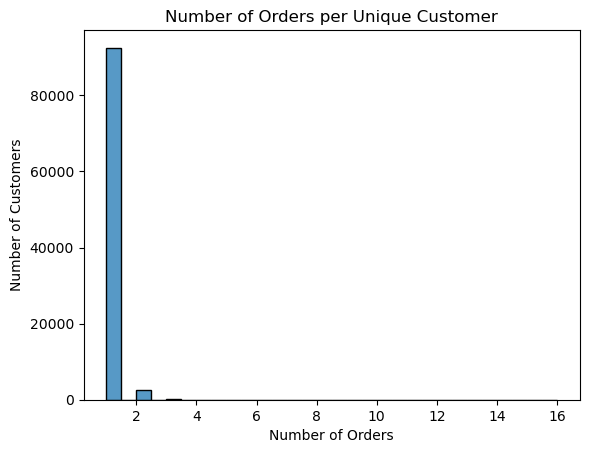

In [68]:
### Identify one-time buyers vs. repeat buyers ###
order_counts = merged_df.groupby('customer_unique_id')['order_id'].nunique().reset_index(name='num_orders')

sns.histplot(order_counts['num_orders'], bins=30)
plt.title("Number of Orders per Unique Customer")
plt.xlabel("Number of Orders")
plt.ylabel("Number of Customers")

In [21]:
order_counts['buyer_type'] = order_counts['num_orders'].apply(lambda x: 'One-Time' if x == 1 else 'Repeat')

# Percentages
buyer_distribution = order_counts['buyer_type'].value_counts(normalize=True) * 100
print(buyer_distribution)

buyer_type
One-Time    96.947181
Repeat       3.052819
Name: proportion, dtype: float64


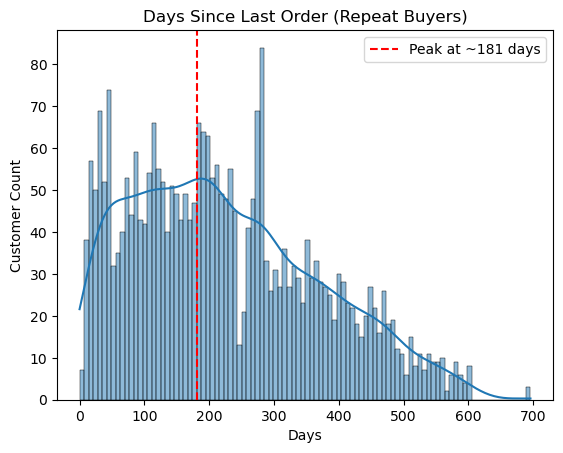

In [70]:
### Determine time threshold to indicate churn for repeat customers ###
repeat_buyers = order_counts[order_counts['num_orders'] > 1]
last_order = merged_df.groupby('customer_unique_id')['order_purchase_timestamp'].max().reset_index()
latest_date = merged_df['order_purchase_timestamp'].max()

last_order = last_order.merge(repeat_buyers[['customer_unique_id']], on='customer_unique_id')
last_order['days_since_last_order'] = (latest_date - last_order['order_purchase_timestamp']).dt.days

counts, bins = np.histogram(last_order['days_since_last_order'], bins=50)
peak_index = np.argmax(counts)
peak_day = bins[peak_index]

sns.histplot(last_order['days_since_last_order'], bins=100, kde=True)
plt.axvline(peak_day, color='red', linestyle='--', label=f'Peak at ~{peak_day:.0f} days')
plt.title("Days Since Last Order (Repeat Buyers)")
plt.xlabel("Days")
plt.ylabel("Customer Count")
plt.legend()
plt.show()

In [87]:
### Label churn for all customers ###

# Last purchase date
last_order = merged_df.groupby('customer_unique_id')['order_purchase_timestamp'].max().reset_index()
last_order.columns = ['customer_unique_id', 'last_order_date']

# merge with order counts
customer_churn = order_counts.merge(last_order, on='customer_unique_id')

# Calculate days since last order
latest_date = merged_df['order_purchase_timestamp'].max()
customer_churn['days_since_last_order'] = (latest_date - customer_churn['last_order_date']).dt.days

# One time buyers are considered churned. Repeat buyers inactive for 180+ days are considered churned
customer_churn['churned'] = (
    (customer_churn['num_orders'] == 1) |
    ((customer_churn['num_orders'] > 1) & (customer_churn['days_since_last_order'] > 180))
)

# Step 6: Merge churn label back into merged_df
merged_df = merged_df.merge(customer_churn[['customer_unique_id', 'churned']], on='customer_unique_id', how='left')
merged_df[['customer_unique_id', 'churned']].head(20)

,customer_unique_id,churned
0,7c396fd4830fd04220f754e42b4e5bff,True
1,7c396fd4830fd04220f754e42b4e5bff,True
2,7c396fd4830fd04220f754e42b4e5bff,True
3,af07308b275d755c9edb36a90c618231,True
4,3a653a41f6f9fc3d2a113cf8398680e8,True
5,7c142cf63193a1473d2e66489a9ae977,True
6,72632f0f9dd73dfee390c9b22eb56dd6,True
7,80bb27c7c16e8f973207a5086ab329e2,True
8,36edbb3fb164b1f16485364b6fb04c73,True
9,932afa1e708222e5821dac9cd5db4cae,True


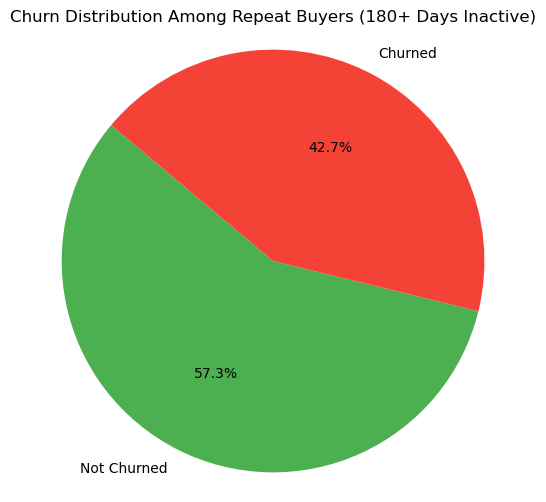

In [89]:
### Pie chart of churn among repeat buyers
repeat_churn = customer_churn[customer_churn['num_orders'] > 1]

repeat_churn_pct = repeat_churn['churned'].value_counts(normalize=True) * 100

# Label
labels = ['Not Churned', 'Churned'] if True in repeat_churn_pct.index else ['Churned', 'Not Churned']

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    repeat_churn_pct,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=['#4CAF50', '#F44336']
)
plt.title("Churn Distribution Among Repeat Buyers (180+ Days Inactive)")
plt.axis('equal')
plt.show()

### 4.2 Churn Drivers for Repeat Customers.


In [ ]:
# Create repeat_df, since analyzing one-time buyers will cause bias
repeat_ids = merged_df.groupby('customer_unique_id')['order_id'].nunique()
repeat_ids = repeat_ids[repeat_ids > 1].index
repeat_df = merged_df[merged_df['customer_unique_id'].isin(repeat_ids)]

latest_date = repeat_df['order_purchase_timestamp'].max()
cutoff_date = latest_date - pd.Timedelta(days=180)

# only for diagrams where time-based operations matter (ensure missclassification is avoided)
filtered_df = repeat_df[repeat_df['order_purchase_timestamp'] <= cutoff_date]

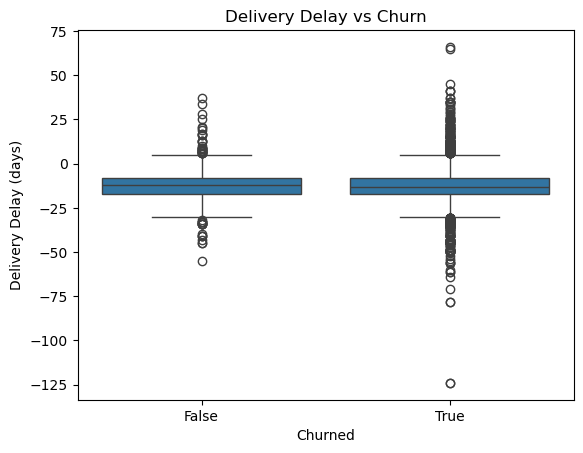

In [131]:
### Delivery delay ###
merged_df['delivery_delay'] = (merged_df['order_delivered_customer_date'] - merged_df['order_estimated_delivery_date']).dt.days
merged_df['delivery_delay'] = merged_df['delivery_delay'].fillna(0)

sns.boxplot(data=filtered_df, x='churned', y='delivery_delay')
plt.title("Delivery Delay vs Churn")
plt.xlabel("Churned")
plt.ylabel("Delivery Delay (days)")
plt.show()

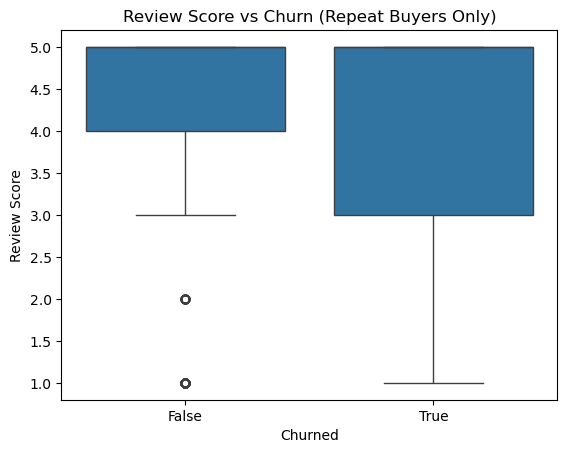

In [103]:
### Review Score ###
sns.boxplot(data=filtered_df, x='churned', y='review_score')
plt.title("Review Score vs Churn (Repeat Buyers Only)")
plt.xlabel("Churned")
plt.ylabel("Review Score")
plt.show()

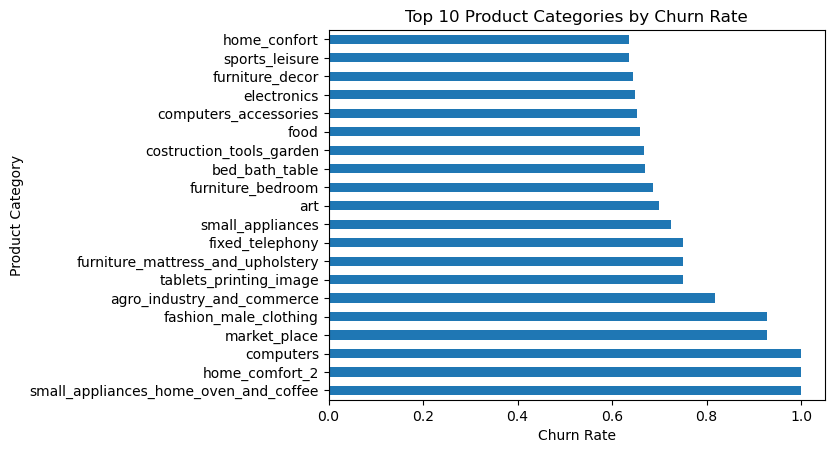

In [105]:
### Churn by product category ###
category_churn = repeat_df.groupby('product_category_name_english')['churned'].mean().sort_values(ascending=False).head(20)
category_churn.plot(kind='barh')
plt.title("Top 10 Product Categories by Churn Rate")
plt.xlabel("Churn Rate")
plt.ylabel("Product Category")
plt.show()

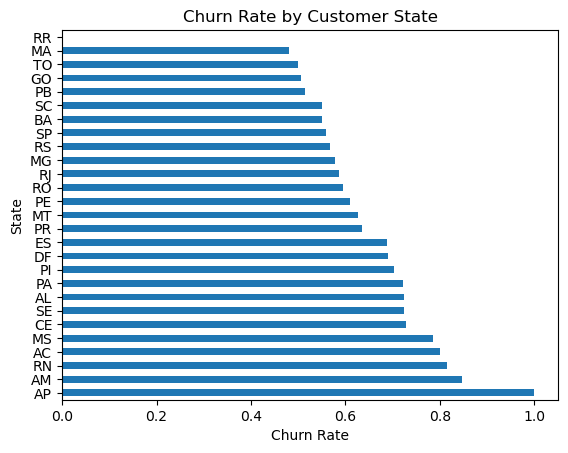

In [107]:
### Churn by custoemr state ###
state_churn = repeat_df.groupby('customer_state')['churned'].mean().sort_values(ascending=False)
state_churn.plot(kind='barh')
plt.title("Churn Rate by Customer State")
plt.xlabel("Churn Rate")
plt.ylabel("State")
plt.show()

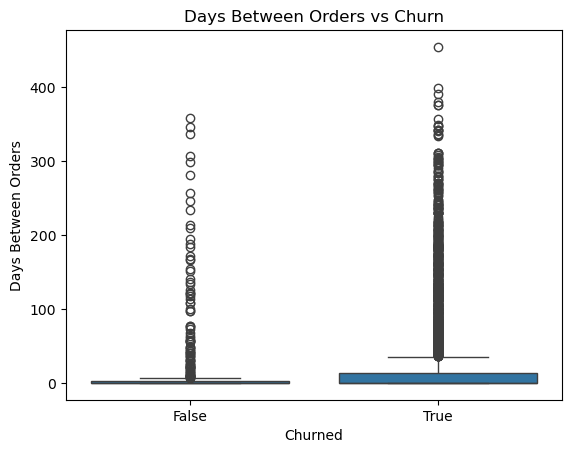

In [115]:
### Days between orders ###
orders_sorted = filtered_df.sort_values(['customer_unique_id', 'order_purchase_timestamp'])
orders_sorted['prev_order_date'] = orders_sorted.groupby('customer_unique_id')['order_purchase_timestamp'].shift()
orders_sorted['days_between_orders'] = (orders_sorted['order_purchase_timestamp'] - orders_sorted['prev_order_date']).dt.days

sns.boxplot(data=orders_sorted, x='churned', y='days_between_orders')
plt.title("Days Between Orders vs Churn")
plt.xlabel("Churned")
plt.ylabel("Days Between Orders")
plt.show()

         count        mean  median         std   min      max
churned                                                      
False     1051  170.222759  111.54  236.505385  0.33  1988.55
True      4947  156.685666  100.50  198.454851  0.00  4950.34


C:\Users\anamm\AppData\Local\Temp\ipykernel_38088\2265952542.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=filtered_df, x='churned', y='payment_value', estimator=np.median, ci='sd')


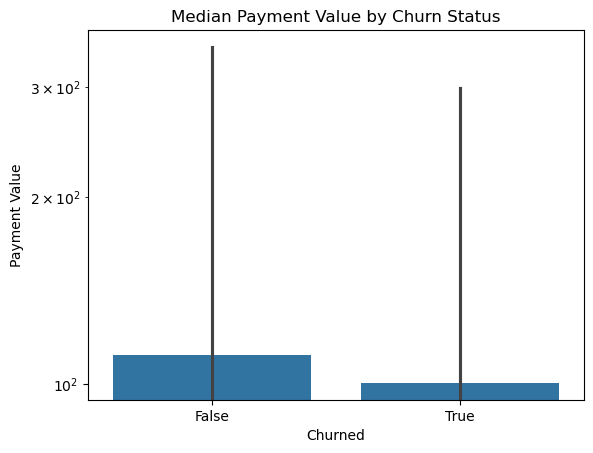

In [133]:
### Median payment value ###
summary = filtered_df.groupby('churned')['payment_value'].agg(['count', 'mean', 'median', 'std', 'min', 'max'])
print(summary)

sns.barplot(data=filtered_df, x='churned', y='payment_value', estimator=np.median, ci='sd')
plt.yscale('log')
plt.title('Median Payment Value by Churn Status')
plt.xlabel('Churned')
plt.ylabel('Payment Value')
plt.show()

C:\Users\anamm\AppData\Local\Temp\ipykernel_38088\3585078422.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['order_calendar_month'] = filtered_df['order_purchase_timestamp'].dt.month


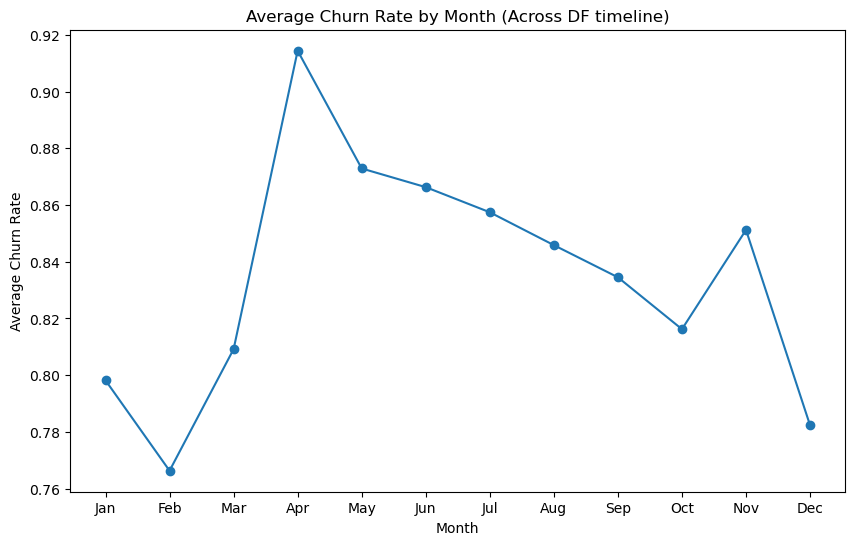

In [123]:
### Monthly churn rate ###
filtered_df['order_calendar_month'] = filtered_df['order_purchase_timestamp'].dt.month
monthly_avg_churn = filtered_df.groupby('order_calendar_month')['churned'].mean()

plt.figure(figsize=(10, 6))
monthly_avg_churn.plot(marker='o')
plt.title("Average Churn Rate by Month (Across DF timeline)")
plt.xlabel("Month")
plt.ylabel("Average Churn Rate")
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

C:\Users\anamm\AppData\Local\Temp\ipykernel_38088\3153340486.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['churned_num'] = filtered_df['churned'].astype(int)


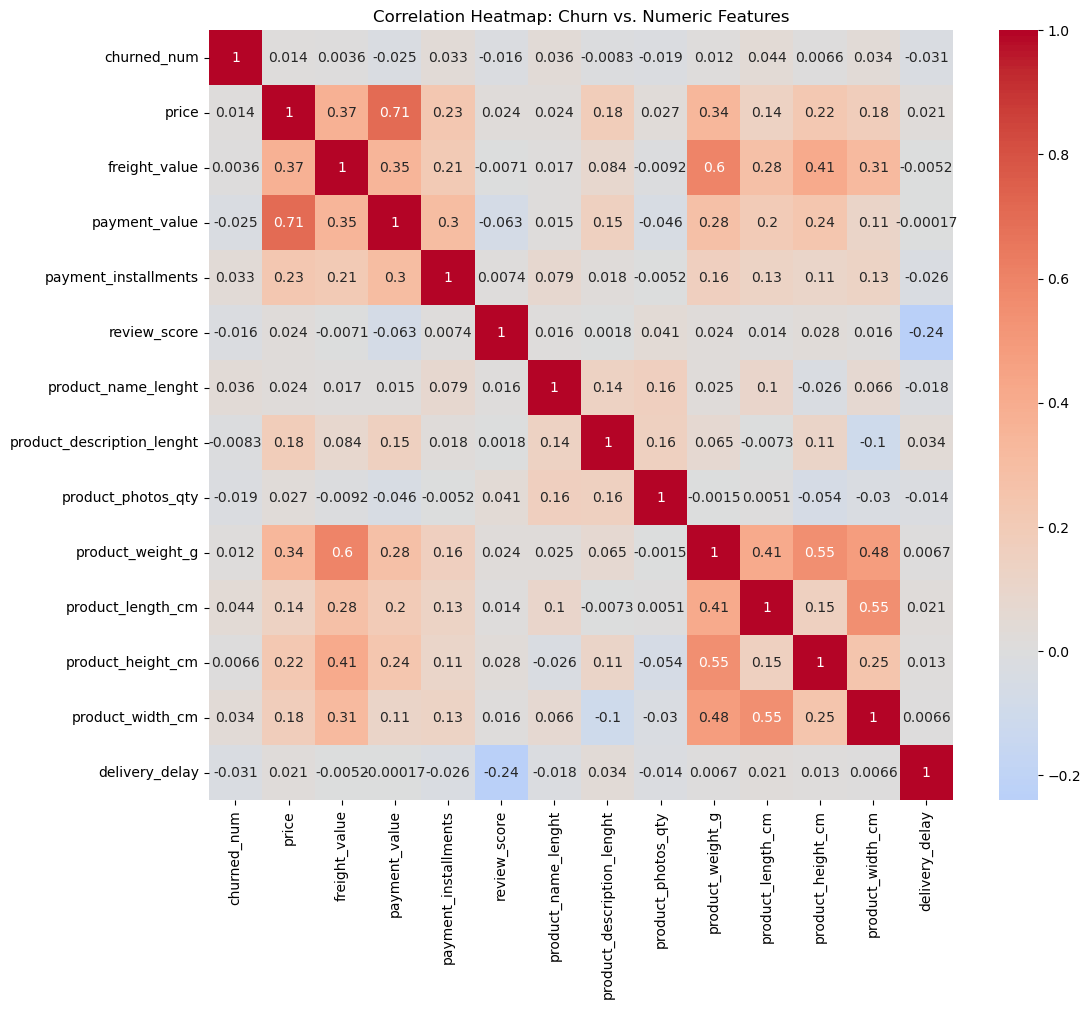

In [ ]:
### Correlation heatmap ###

# Convert churn to int
filtered_df['churned_num'] = filtered_df['churned'].astype(int)

corr_cols = [
    'churned_num', 'price', 'freight_value', 'payment_value',
    'payment_installments', 'review_score', 'product_name_lenght',
    'product_description_lenght', 'product_photos_qty', 'product_weight_g',
    'product_length_cm', 'product_height_cm', 'product_width_cm',
    'delivery_delay'
]

corr = filtered_df[corr_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap: Churn vs. Numeric Features')
plt.show()